#Yousef Ahmad Jallad
#1190030

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Part 1:  Read the dataset and examine how many features and examples does it have?


In [15]:
df = pd.read_csv('cars.csv')
df.shape[0]
df.shape[1]


df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        396 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [16]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,USA
1,15.0,8,350.0,165.0,3693,11.5,70,USA
2,18.0,8,318.0,150.0,3436,11.0,70,USA
3,16.0,8,304.0,150.0,3433,12.0,70,USA
4,17.0,8,302.0,140.0,3449,10.5,70,USA


Check if the file was read correctly

#Part 2: Are there features with missing values? How many missing values are there in each one?






In [17]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64

As demonsrated above there a 6 missing vlaues in horsepower, and 2 missing values in origin

#Part 3: Fill the missing values in each feature using a proper imputation method

In [18]:
df[df.isnull().all(axis=1)]

df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df['origin'].fillna(df['origin'].mode()[0], inplace=True)


In [19]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

As shown above, there are no more missing values

#Part 4: Which country produces cars with better fuel economy?

using a boxplot to compare the spread and medians of each country

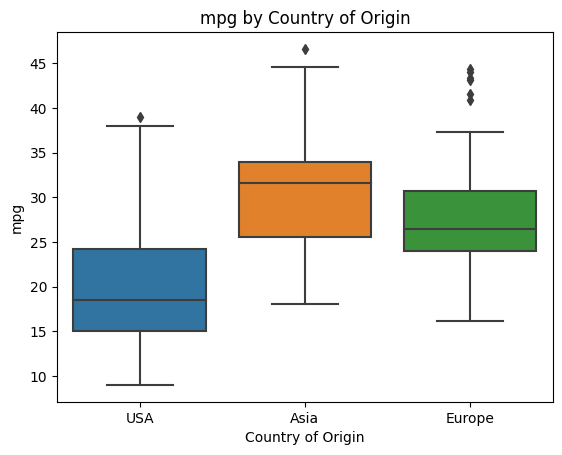

In [21]:
sns.boxplot(x='origin', y='mpg', data=df)
plt.title('mpg by Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('mpg')
plt.show()

As shown above, Asia has the highest mpg, and thats because the median is the highest of all three.



#Part 5:  Which of the following features has a distribution that is most similar to a Gaussian: ‘acceleration’, ‘horsepower’, or ‘mpg’? Answer this part by showing the histogram of each feature.

Text(0.5, 1.0, 'Acceleration hoursepower')

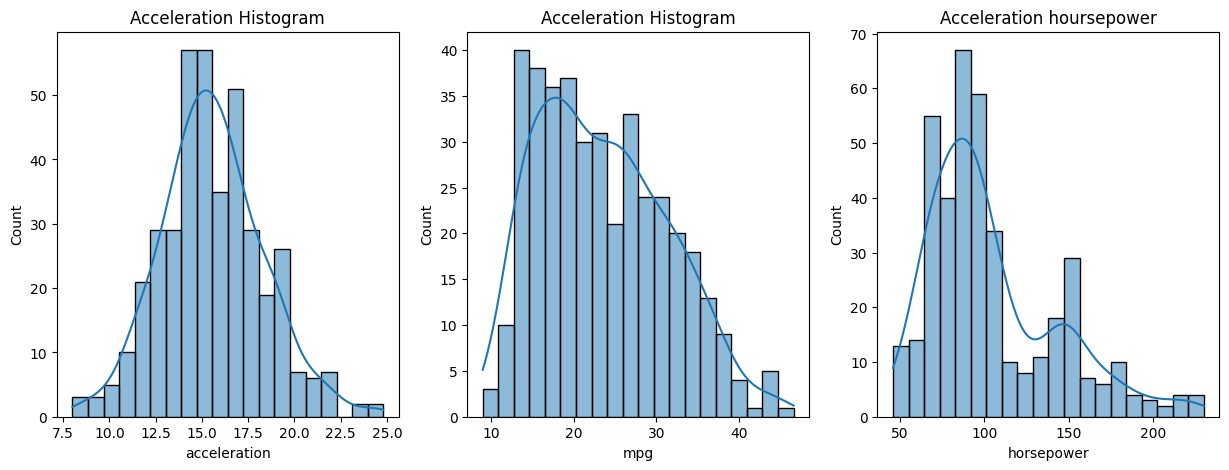

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['acceleration'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Acceleration Histogram")

sns.histplot(df['mpg'], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Acceleration Histogram")

sns.histplot(df['horsepower'], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Acceleration hoursepower")

as it can be seen from the figures above, the plot that looks more like gaussian distribution is the acceleration.

#Part 6: Support your answer for part 5 by using a quantitative measure.

We have to calculate skewness and kurtosis for each feature

In [36]:
skewness_acceleration = df['acceleration'].skew()
kurtosis_acceleration = df['acceleration'].kurtosis()
print("Acceleration skewness:",skewness_acceleration)
print("Acceleration kurtosis:",kurtosis_acceleration)

skewness_mpg = df['mpg'].skew()
kurtosis_mpg = df['mpg'].kurtosis()
print("MPG skewness:",skewness_mpg)
print("MPG kurtosis:",kurtosis_mpg)

skewness_horsepower = df['horsepower'].skew()
kurtosis_horsepower = df['horsepower'].kurtosis()
print("horsepower skewness:",skewness_horsepower)
print("horsepower kurtosis:",kurtosis_horsepower)

Acceleration skewness: 0.27877684462588986
Acceleration kurtosis: 0.4194968829706842
MPG skewness: 0.45706634399491913
MPG kurtosis: -0.5107812652123154
horsepower skewness: 1.1062242930872614
horsepower kurtosis: 0.7635832666961107


Acceleration has the closest values to zero for both skewness and kurtosis, indicating that this characteristic has the greatest symmetry

#Part 7: Plot a scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the y-axis. Is there a correlation between them? Positive or negative?

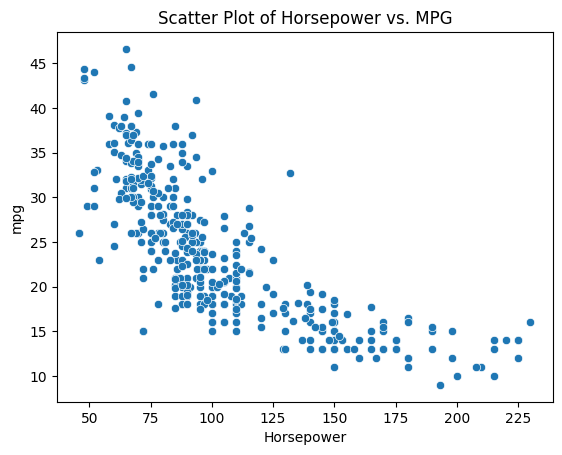

In [39]:
sns.scatterplot(x='horsepower', y='mpg', data=df)
plt.title('Scatter Plot of Horsepower vs. MPG')
plt.xlabel('Horsepower')
plt.ylabel('mpg')
plt.show()

When the horsepower grows the mpg decreases exponentially (negative corellation)

#Part 8: Implement the closed form solution of linear regression and use it to learn a linear model to predict the ‘mpg’ from the ‘horsepower’. Plot the learned line on the same scatter plot you got in part 7. (Hint: This is a simple linear regression problem (one feature). Do not forget to add x0=1 for the intercept. For inverting a matrix use np.linalg.inv from NumPy)

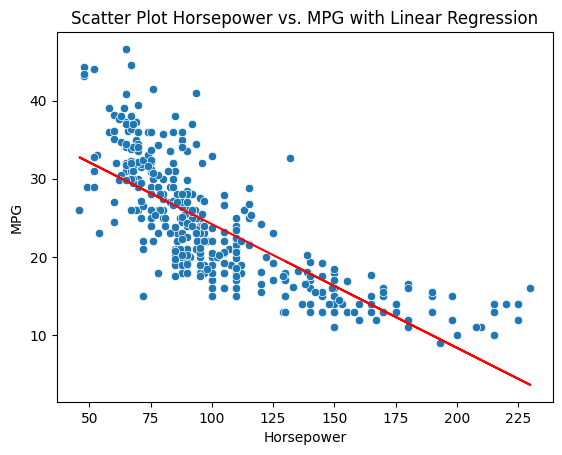

In [57]:
# Create a copy of the DataFrame for linear regression
df_linear = df.copy()

# Add a column of ones for the intercept (x0)
df_linear['intercept'] = 1

# Extract features (X) and target (y)
X = df_linear[['intercept', 'horsepower']].values
y = df_linear['mpg'].values

# Calculate the optimal theta using the normal equation
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Scatter plot of 'Horsepower' vs. 'MPG'
sns.scatterplot(x='horsepower', y='mpg', data=df_linear)

# Plot the learned line based on the calculated theta
plt.plot(df_linear['horsepower'], X.dot(theta), color='red', label='Learned Line')

# Set plot labels and title
plt.title('Scatter Plot Horsepower vs. MPG with Linear Regression')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

# Display the plot
plt.show()

linear function is solved using the equation y = slope * x + y-intercept

#Part 9: Repeat part 8 but now learn a quadratic function of the form f = w0 + w1x + w2x^2.

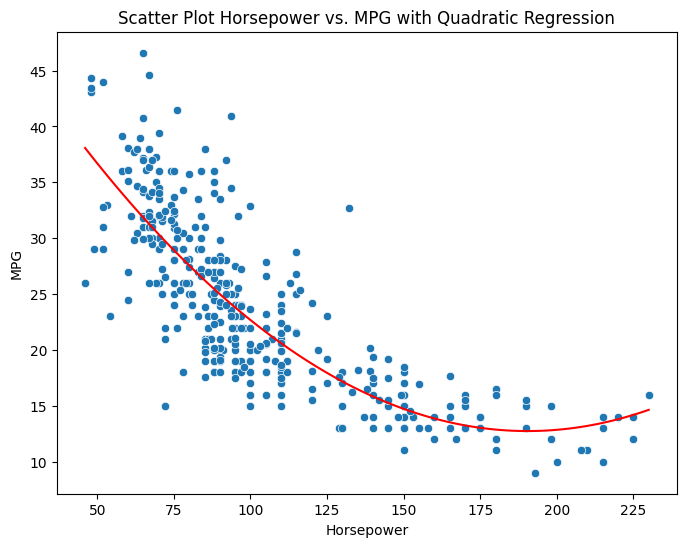

In [58]:
df_Quad = df.copy()

# Add a column of ones for the intercept (x0)
df_Quad['intercept'] = 1

# Add a quadratic term to the design matrix X
df_Quad['horsepower_squared'] = df_Quad['horsepower'] ** 2
X = df_Quad[['intercept', 'horsepower', 'horsepower_squared']].values

# Target vector y
y = df_Quad['mpg'].values

# Calculate the closed-form solution using the normal equation
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='mpg', data=df_Quad)

# Generate points for the quadratic function
x_values = np.linspace(df_Quad['horsepower'].min(), df_Quad['horsepower'].max(), 100)
y_values = theta[0] + theta[1] * x_values + theta[2] * x_values**2


plt.plot(x_values, y_values, color='red')


plt.title('Scatter Plot Horsepower vs. MPG with Quadratic Regression')
plt.xlabel('Horsepower')
plt.ylabel('MPG')

plt.show()

from the above plot, we can notice that the quadratic function is better suited than the linear one and has a higher accuracy due to its curvance.

#Part 10: Repeat part 8 (simple linear regression case) but now by implementing the gradient descent algorithm instead of the closed form solution.

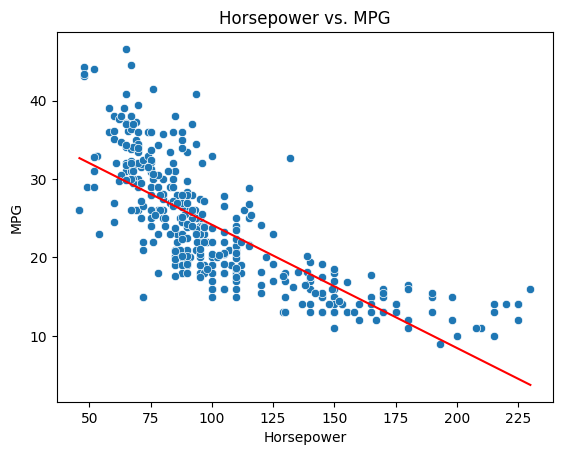

In [56]:
# Make a copy of the DataFrame
data = df.copy()

# Prepare features and target
bias = np.ones(data['horsepower'].shape[0])
features = np.c_[bias, data['horsepower']]
target = data['mpg'].values

# Set hyperparameters
learningRate = 0.0001
iterations = 500000

# Initialize weights
theta = np.zeros(2)

# Gradient Descent
for i in range(iterations):
    pred = features.dot(theta)
    error = pred - target
    grad = features.T.dot(error) / len(target)
    theta -= learningRate * grad

# Calculate y values for the regression line
y_gd = theta[0] + theta[1] * np.array([data['horsepower'].min(), data['horsepower'].max()])

# Plot the scatter plot and regression line
sns.scatterplot(x='horsepower', y='mpg', data=data)
plt.title('Horsepower vs. MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.plot([data['horsepower'].min(), data['horsepower'].max()], y_gd, color='red')

plt.show()


In order to determine the slope of the function, we first generate the feature matrix using the bias column. Next, we start the weights at 0, do iterations, and experiment with different learning rates. It was discovered that this method was effective.